In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Set 2

## load and explore the data set

In [2]:
# load the data
data_val = pd.read_csv('../data/datatest2.csv', index_col = 0)
data_val.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,11/02/2015 14:48,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,11/02/2015 14:49,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,11/02/2015 14:50,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,11/02/2015 14:51,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,11/02/2015 14:51,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [4]:
# check df shape
data_val.shape

(9752, 7)

In [5]:
# check indexes
data_val.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            9743, 9744, 9745, 9746, 9747, 9748, 9749, 9750, 9751, 9752],
           dtype='int64', length=9752)

In [6]:
# check the data types
data_val.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [7]:
# convert date column to date data type
data_val['date'] = pd.to_datetime(data_val['date'])
data_val.dtypes

date             datetime64[ns]
Temperature             float64
Humidity                float64
Light                   float64
CO2                     float64
HumidityRatio           float64
Occupancy                 int64
dtype: object

In [8]:
# general overview
data_val.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [9]:
# check the total records of occupancy
data_val['Occupancy'].value_counts()

0    7703
1    2049
Name: Occupancy, dtype: int64

In [10]:
# check for duplicates
data_val.duplicated().sum()

27

In [11]:
# check the duplicated rows
data_val[data_val.duplicated()]

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2480,2015-02-13 08:06:00,21.00,25.500,14.0,522.0,0.003918,0
3200,2015-02-13 20:06:00,20.70,31.790,0.0,515.0,0.004802,0
3778,2015-02-14 05:44:00,19.60,38.290,0.0,506.0,0.005409,0
3785,2015-02-14 05:51:00,19.60,38.290,0.0,504.5,0.005409,0
4267,2015-02-14 13:53:00,20.50,35.400,37.0,509.0,0.005286,0
4477,2015-02-14 17:23:00,20.00,35.590,14.0,520.0,0.005152,0
4644,2015-02-14 20:10:00,19.79,35.500,0.0,524.0,0.005072,0
4768,2015-02-14 22:14:00,19.89,35.700,0.0,530.0,0.005132,0
4788,2015-02-14 22:34:00,19.84,36.000,0.0,534.0,0.005160,0
4792,2015-02-14 22:38:00,19.89,36.000,0.0,535.0,0.005176,0


In [12]:
'''
the records are from the same day but different time
'''

'\nthe records are from the same day but different time\n'

In [13]:
# check the date column range
print(data_val['date'].min())
print(data_val['date'].max())

2015-02-13 00:00:00
2015-12-02 23:58:00


In [14]:
# set date to index
data_val_dateidx = data_val.set_index('date')
data_val_dateidx.head()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-11-02 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2015-11-02 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2015-11-02 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
2015-11-02 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
2015-11-02 14:51:00,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [15]:
# check the index
data_val_dateidx.index

DatetimeIndex(['2015-11-02 14:48:00', '2015-11-02 14:49:00',
               '2015-11-02 14:50:00', '2015-11-02 14:51:00',
               '2015-11-02 14:51:00', '2015-11-02 14:53:00',
               '2015-11-02 14:54:00', '2015-11-02 14:55:00',
               '2015-11-02 14:55:00', '2015-11-02 14:57:00',
               ...
               '2015-02-18 09:10:00', '2015-02-18 09:10:00',
               '2015-02-18 09:11:00', '2015-02-18 09:13:00',
               '2015-02-18 09:14:00', '2015-02-18 09:15:00',
               '2015-02-18 09:16:00', '2015-02-18 09:16:00',
               '2015-02-18 09:17:00', '2015-02-18 09:19:00'],
              dtype='datetime64[ns]', name='date', length=9752, freq=None)

In [16]:
# checking for missing values
data_val_dateidx.isnull().sum()

Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

## Evaluate the correlatation

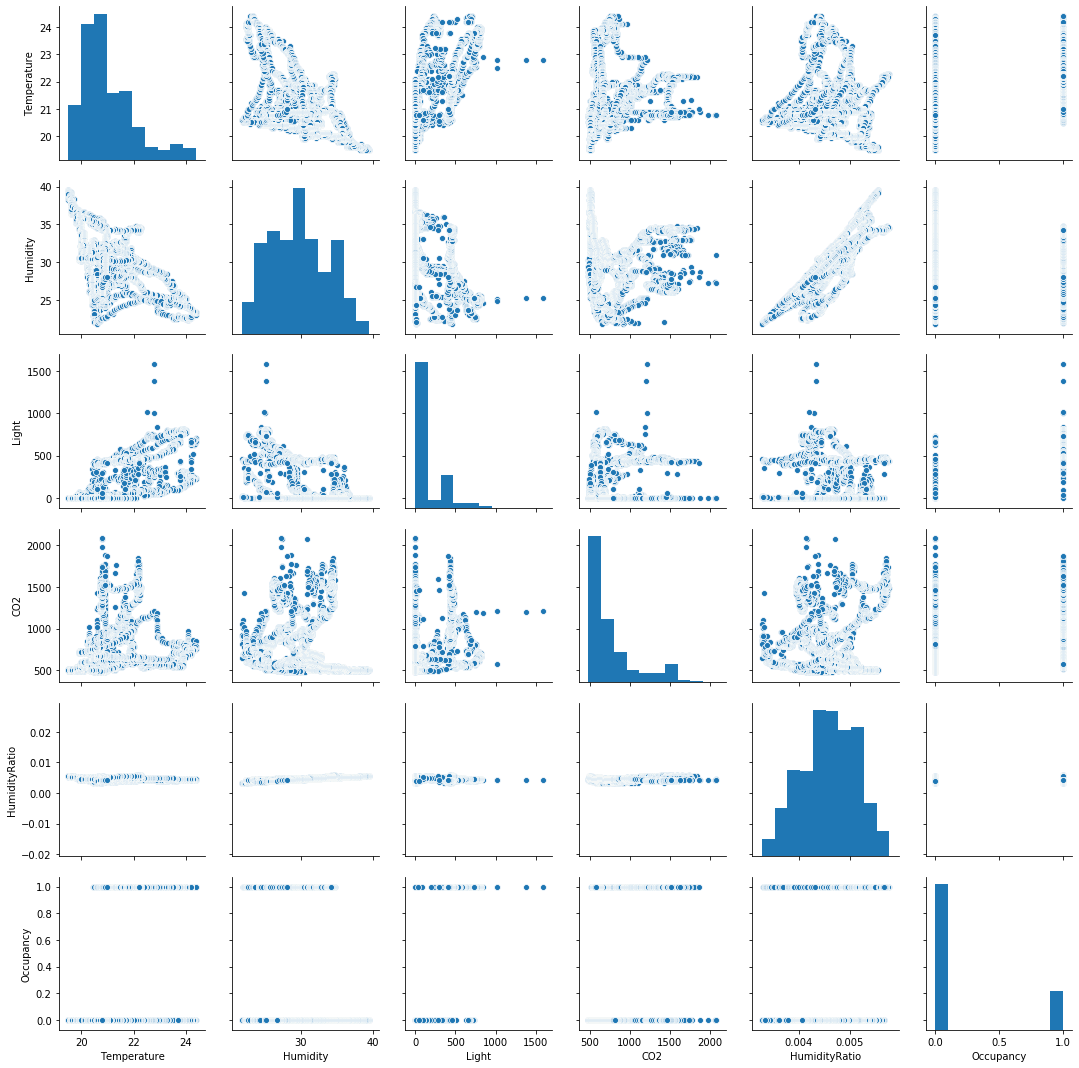

In [17]:
# create pairplot
import seaborn as sns
sns.pairplot(data_val_dateidx)
plt.show()

In [18]:
# create correlation matrix
data_val_dateidx_corr = data_val_dateidx.corr()
corr_mask = abs(data_val_dateidx.corr()) > 0.5
data_val_dateidx_corr[corr_mask]

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,NaN,0.705538,NaN,NaN,0.521767
Humidity,NaN,1.000000,NaN,NaN,0.884104,NaN
Light,0.705538,NaN,1.000000,NaN,NaN,0.914525
CO2,NaN,NaN,NaN,1.0,NaN,NaN
HumidityRatio,NaN,0.884104,NaN,NaN,1.000000,NaN
Occupancy,0.521767,NaN,0.914525,NaN,NaN,1.000000


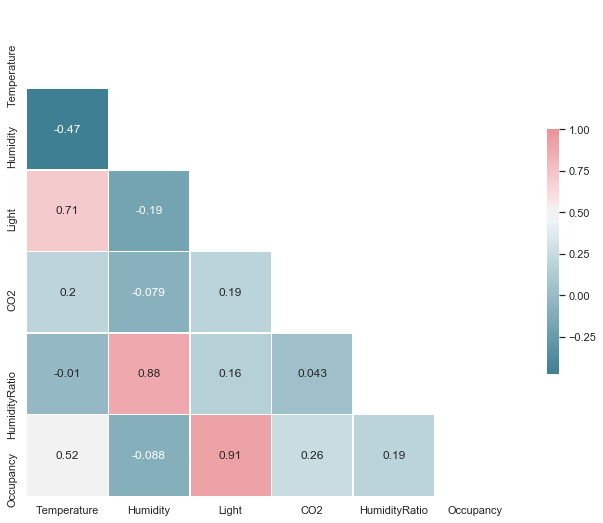

In [19]:
# create heatmap
sns.set(style="white")

# generate a mask for the upper triangle
mask = np.zeros_like(data_val_dateidx_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap = True)

# draw the heatmap with the mask and correct aspect ration
sns.heatmap(data_val_dateidx_corr, mask = mask, cmap = cmap, center = 0.5,
           annot = True, square = True, linewidths=.5, cbar_kws={'shrink':.5})
plt.show()

In [22]:
'''
light is the one more correlated with occupancy
'''

'\nlight is the one more correlated with occupancy\n'

In [21]:
data_val_dateidx.to_csv('../data/dataset2.csv')